In [7]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import scipy.stats as stat
import scipy as sp
import statistics

import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

#import warnings
#warnings.filterwarnings('ignore')

# Modèle de ML
from sklearn import linear_model

# data pre-processing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Outils score et evaluation de modèle
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import r2_score

# Outils optmisation de modèle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold



import joblib
from joblib import dump,load
import pickle


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Result_final_3.csv")

In [3]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [30]:
df.SurfaceMin.max()

2500

In [50]:
z = df.loc[df['CodePostal'] == 69000]
z.head()

,MandatId,DateCreation,BienMandatId,Statut,DescriptionBien_DateOffreAcceptee,Origine_DateCollecte,CritereId,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,Departement_LocalisationId,Region_LocalisationId,LocalisationId,StatutMandat,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Ville,Departement,Region,Succes,Cluster
584857,867,2012-09-26,857,7,0001-01-01,2013-10-01,867,70,4,3,126,27,30117,9,1,1,1,220000,69000,Lyon,Rhône,Rhône-Alpes,0,0
584858,867,2012-09-26,858,7,0001-01-01,2013-10-01,867,70,4,3,126,27,30117,9,1,1,1,220000,69000,Lyon,Rhône,Rhône-Alpes,0,0
584859,867,2012-09-26,859,7,0001-01-01,2013-10-01,867,70,4,3,126,27,30117,9,1,1,1,220000,69000,Lyon,Rhône,Rhône-Alpes,0,0
584860,867,2012-09-26,860,7,0001-01-01,2013-10-01,867,70,4,3,126,27,30117,9,1,1,1,220000,69000,Lyon,Rhône,Rhône-Alpes,0,0
584861,867,2012-09-26,861,7,0001-01-01,2013-10-01,867,70,4,3,126,27,30117,9,1,1,1,220000,69000,Lyon,Rhône,Rhône-Alpes,0,0


In [6]:
x =df[["BudgetMaxEuro", 'SurfaceMin','NombrePiecesEnum',
       'NombreChambresEnum',
       'TypeMission', 'TypeBien', 'TypeProjet',
       'CodePostal']]

In [22]:
x = np.array(x)

In [23]:
# Collecting the distortions into list
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)

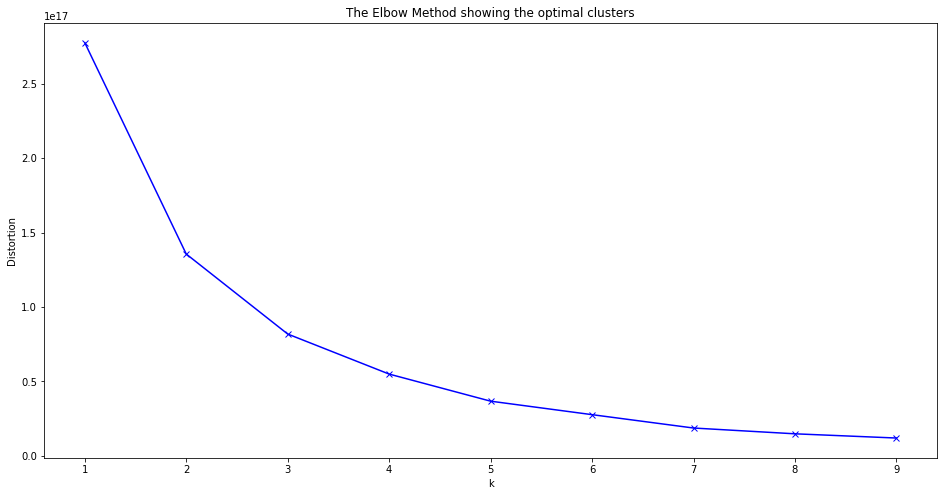

In [24]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

In [25]:
# Define the model
kmeans_model = KMeans(n_clusters=2, random_state=32932)
# Fit into our dataset fit
kmeans_predict = kmeans_model.fit_predict(x)

In [26]:
df["Cluster"] = kmeans_predict

In [27]:
df.head()

,MandatId,DateCreation,BienMandatId,Statut,DescriptionBien_DateOffreAcceptee,Origine_DateCollecte,CritereId,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,Departement_LocalisationId,Region_LocalisationId,LocalisationId,StatutMandat,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Ville,Departement,Region,Succes,Cluster
0,9049,2015-03-30,24579,1,0001-01-01,0001-01-01,9051,30,2,1,121,27,129,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0,0
1,9049,2015-03-30,24580,0,0001-01-01,0001-01-01,9051,30,2,1,121,27,129,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0,0
2,9049,2015-03-30,24582,1,0001-01-01,0001-01-01,9051,30,2,1,121,27,129,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0,0
3,9049,2015-03-30,24583,0,0001-01-01,0001-01-01,9051,30,2,1,121,27,129,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0,0
4,9049,2015-03-30,24584,7,0001-01-01,0001-01-01,9051,30,2,1,121,27,129,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0,0


In [28]:
df["Cluster"].value_counts()

0    1626745
1     116512
Name: Cluster, dtype: int64

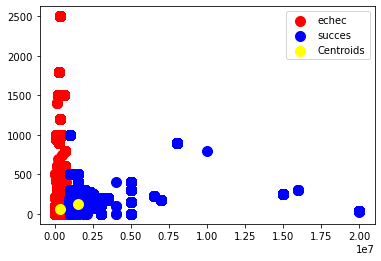

In [29]:
# Visualising the clusters
plt.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 1], s = 100, c = 'red', label = "echec")
plt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 1], s = 100, c = 'blue', label = "succes")
#plt.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 1], s = 100, c = ‘green’, label = ‘Virginica’)
# Plotting the centroids of the clusters
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()